In [5]:
!pip install rioxarray

  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/4e/34/8ee402df8a49228b6aae89ab2127cdd5aa0ba0976904af7d55270f4f30b8/rioxarray-0.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for xarray>=0.17 from https://files.pythonhosted.org/packages/c3/0a/56eadeb54f258e88f2f31e79fcb84079f8757298f4257d716cbbc674c460/xarray-2023.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import rioxarray
import os
import random
import matplotlib.pyplot as plt

In [13]:
def plot_random_predictions(num_plots=5, source_dir = '/home/workdir/kenya_output'):
    pred_dir = os.path.join(source_dir, 'hardened_prob')
    fig, axes = plt.subplots(num_plots, 3, figsize=(15, (5*num_plots)))
    tif_files = [file for file in os.listdir(pred_dir) if file.endswith('.tif')]
    for i in range(num_plots):
        tif = tif_files[i*20]
        exampleimg = rioxarray.open_rasterio('/home/data/kenya/images/'+tif[9:])
        examplelbl = rioxarray.open_rasterio('/home/data/kenya/labels/'+tif[9:])
        predictedlbl = rioxarray.open_rasterio(os.path.join(pred_dir, tif))
        row_axes = axes[i]

        # Plot images on the current row of subplots
        exampleimg.plot.imshow(ax=row_axes[0])
        row_axes[0].set_title('Example Image')

        examplelbl.plot(ax=row_axes[1], vmin=0, vmax=3)
        row_axes[1].set_title('Example Label')

        predictedlbl.plot(ax=row_axes[2], vmin=0, vmax=3)
        row_axes[2].set_title('Predicted Label')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.savefig(os.path.join(source_dir, 'predict_vis.png'))

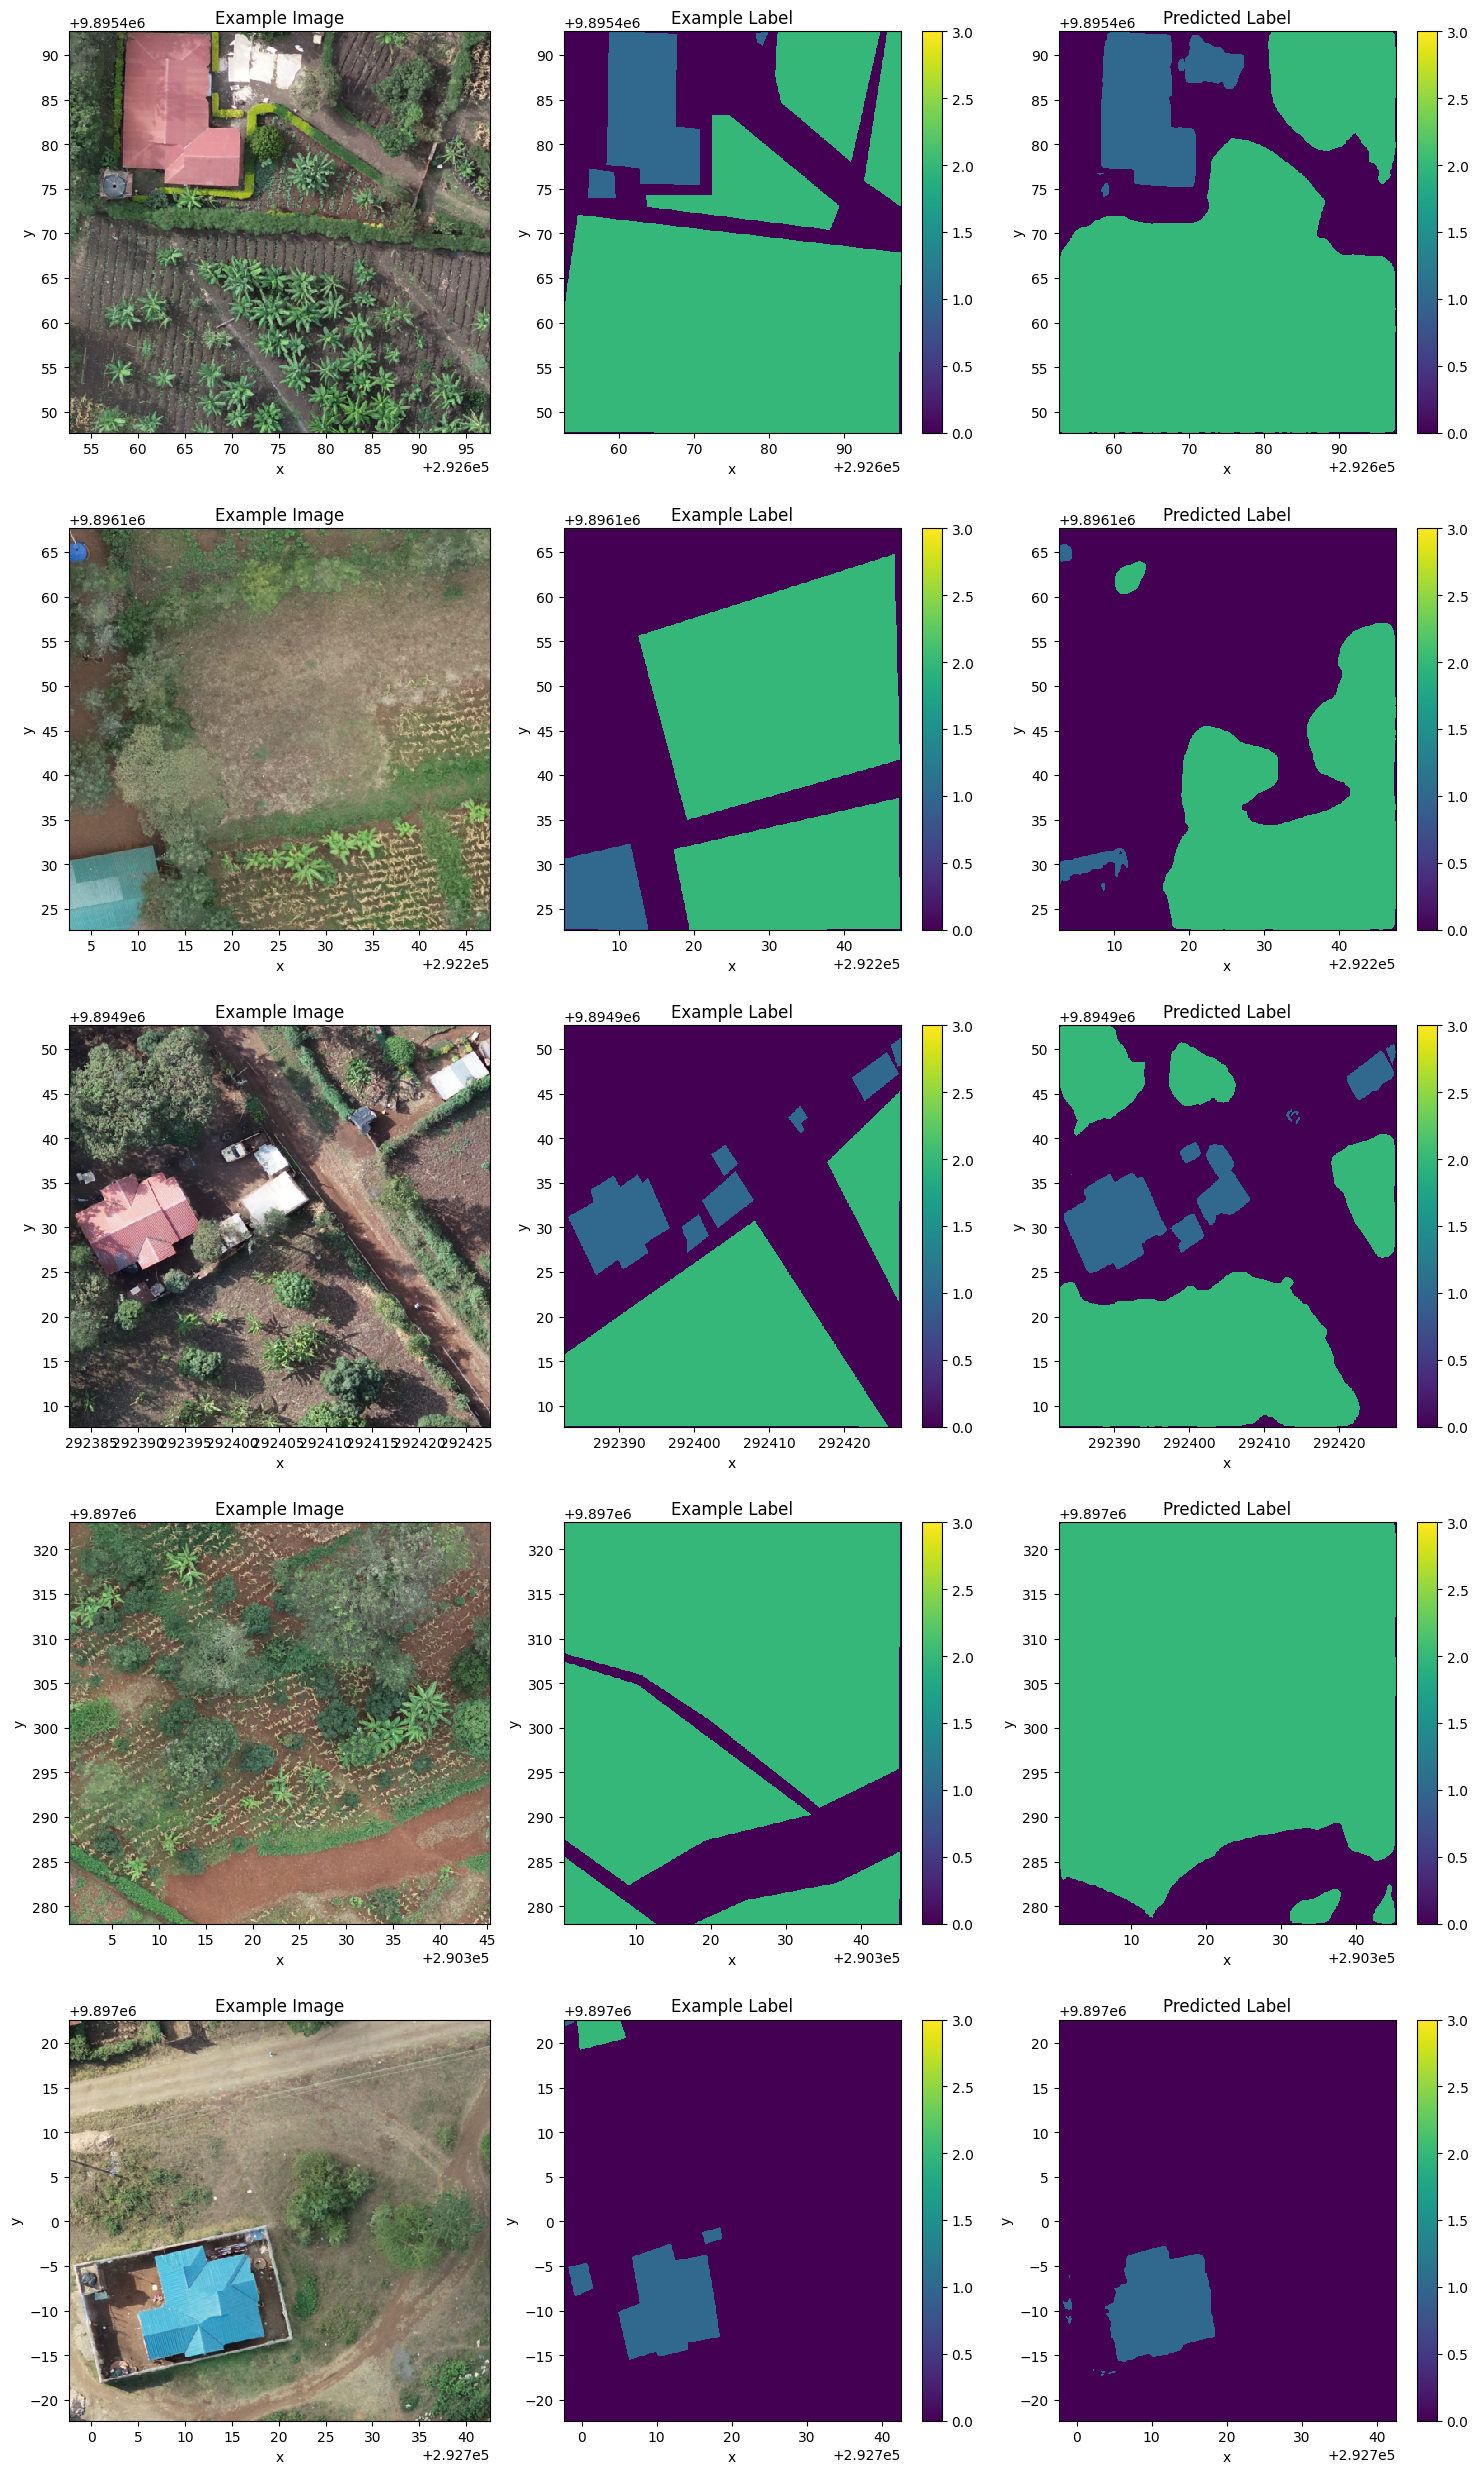

In [17]:
plot_random_predictions(num_plots=5, source_dir = '/home/workdir/kenya_output_sam')